In [61]:
from os.path import splitext, join, exists, isdir,basename,abspath,dirname
import trackpy as tp
import nd2reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
import pims_nd2

%matplotlib inline

In [47]:
def nd2msd(nd_fh):
    frames=pims.ND2_Reader(nd_fh)
    f = tp.batch(frames, 11,np.percentile(frames[0],90))
    t = tp.link_df(f, 11, memory=3)

    # plt.figure()
    # tp.plot_traj(t)

    t_flt = tp.filter_stubs(t, 3*int(len(frames)/4))
    
    imsd=tp.imsd(t_flt,0.1,0.5, max_lagtime=100, statistic='msd')
    imsd=imsd.reset_index()
    ax=plt.subplot(111)
    np.log10(imsd).plot(x="lag time [s]",legend=None,ax=ax)
    # ax.legend(bbox_to_anchor=(1.2, 1.2))

    emsd=tp.emsd(t_flt,0.1,0.5, max_lagtime=100)
    emsd=emsd.reset_index()
    np.log10(emsd).plot(x="lagt",lw=6,color='k',ax=ax)
    return imsd,emsd

In [32]:
ph={"ph 5.5":\
    [["replicate 1","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph5.5_int5s_001.nd2"],\
    ["replicate 2","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph5.5_int5s_002.nd2"],\
    ["replicate 3","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph5.5_int5s_003.nd2"]],\
    "ph 7.0":\
    [["replicate 1","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph7.0_int5s_001.nd2"],\
     ["replicate 2","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph7.0_int5s_002.nd2"],\
     ["replicate 3","/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph7.0_int5s_003.nd2"]]}     

In [ ]:
nd_fh="/media/Transcend/propro/writ/prjs/2_chem_chap_screens/data/yeast_uNS_gfp/160511_uNS_pH/sd_ph5.5_int5s_001.nd2"

Frame 120: 598 trajectories present


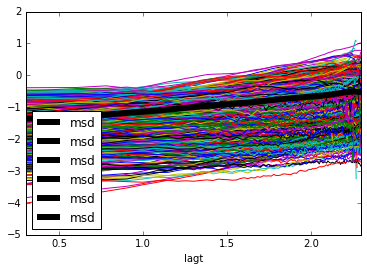

In [38]:
expt_info=pd.DataFrame(ph)
expt_data=pd.DataFrame()    
for test in expt_info:
    test_info=expt_info.loc[:,test]
    test_data=pd.DataFrame()    
    for rep in test_info:        
        nd_fh=rep[1]
        fn="lagt",test+rep[0]
        imsd,emsd=nd2msd(nd_fh)
        emsd.columns=[fn]
        emsd=emsd.set_index("lagt")
        if len(test_data)==0:
            test_data=emsd
        else:
            test_data=pd.concat([test_data,emsd],axis=1)
if len(expt_data)==0:
    expt_data=test_data
else:
    expt_data=pd.concat([expt_data,test_data],axis=1)

In [42]:
test_data.head()

,ph 7.0replicate 1,ph 7.0replicate 2,ph 7.0replicate 3
lagt,,,
2.0,0.056889,0.053209,0.043883
4.0,0.069030,0.064398,0.051905
6.0,NaN,NaN,0.058935
6.0,0.079567,0.073657,NaN
8.0,0.088101,0.080945,0.066666


In [ ]:
# tmp=expt_df.drop_duplicates()
np.log10(expt_df).plot(x="lagt",legend=None)

Frame 120: 598 trajectories present


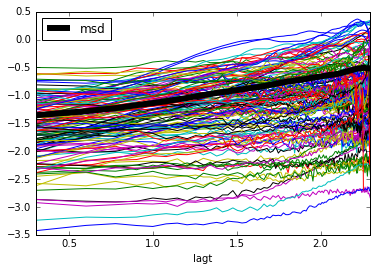

In [43]:
imsd,emsd=nd2msd(nd_fh)

Frame 120: 598 trajectories present


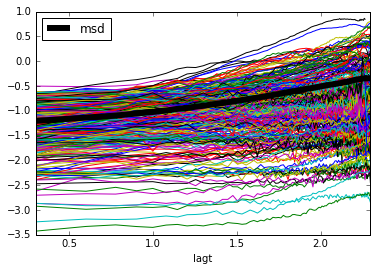

In [46]:
imsd,emsd=nd2msd(nd_fh) # memory 3

Frame 120: 597 trajectories present


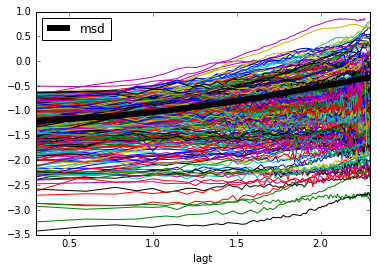

In [48]:
imsd,emsd=nd2msd(nd_fh) #memory 3 intensity 90

In [49]:
imsd.shape

(99, 272)

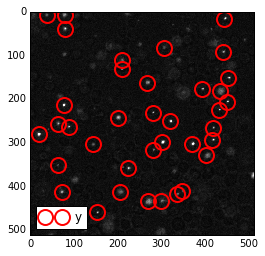

(37, 9)

In [52]:
frames=pims.ND2_Reader(nd_fh)
f = tp.locate(frames[0],11,threshold=np.percentile(frames[0],75))
plt.figure()  # make a new figure
tp.annotate(f, frames[0])
f.shape

In [51]:
# frames=pims.ND2_Reader(nd_fh)
f_batch = tp.batch(frames[0],11,threshold=np.percentile(frames[0],75))
# plt.figure()  # make a new figure
# tp.annotate(f, frames[0])
f_batch.shape

Frame 0: 1 features


(284, 8)

In [59]:
f.sort_values("x").head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame
21,20.118971,281.119685,401584.435031,2.606193,0.031274,13104.175626,656488.0,0.014769,0
1,37.828377,8.413656,102206.989077,2.312766,0.065259,4094.410361,276660.0,0.047604,0
28,62.983693,351.492224,58533.345963,1.629314,0.172071,5155.976581,200206.0,0.086163,0
18,64.119014,256.321920,207122.488539,2.500232,0.030665,8320.454933,409085.0,0.026817,0
32,72.386581,412.774200,209842.322297,2.548110,0.110531,8042.021279,421891.0,0.025731,0


In [60]:
f_batch.sort_values("x").head()

,x,mass,size,ecc,signal,raw_mass,ep,frame
167,19.021102,5129.708218,0.819054,NaN,1764.311428,36674.0,0.142610,0
175,19.364589,10130.660370,1.151651,NaN,2948.209992,39408.0,0.130444,0
174,19.844826,25082.940423,1.242834,NaN,7032.434644,62961.0,0.065834,0
173,19.872515,41809.762575,1.383243,NaN,10331.452177,92128.0,0.038681,0
168,20.022311,17071.854783,1.243723,NaN,4603.127726,52348.0,0.079915,0


In [ ]:
plt.figure()
ax=tp.plot_traj(t)
ax.legend_.remove()

In [ ]:
tp.filter_stubs??

In [ ]:
ax=msd.plot(x="lag time [s]")
ax.legend(bbox_to_anchor=(1.2, 1.2))